In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
from sklearn.model_selection import train_test_split as tts 
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer 


In [4]:
df = pd.read_csv('titanic_toy.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2,random_state=2)

X_train.shape , X_test.shape

((712, 3), (179, 3))

In [9]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [14]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_neg1'] = X_train['Age'].fillna(-1)

X_train['Fare_99'] = X_train['Fare'].fillna(999)
X_train['Fare_neg1'] = X_train['Fare'].fillna(-1)


In [15]:
X_train.sample(5)

,Age,Fare,Family,Age_99,Age_neg1,Fare_99,Fare_neg1
450,36.0,27.7500,3,36.0,36.0,27.7500,27.7500
554,22.0,7.7750,0,22.0,22.0,7.7750,7.7750
517,NaN,24.1500,0,99.0,-1.0,24.1500,24.1500
538,NaN,14.5000,0,99.0,-1.0,14.5000,14.5000
653,NaN,7.8292,0,99.0,-1.0,7.8292,7.8292


In [16]:
print('Original Age variable Variance : ', X_train['Age'].var())
print('Age variable Variance after 99 imputation : ', X_train['Age_99'].var())
print('Age variable Variance after -1 imputation : ', X_train['Age_neg1'].var())

print('Original fare variable Variance : ', X_train['Fare'].var())
print('Fare variable Variance after 99 imputation : ', X_train['Fare_99'].var())
print('Fare variable Variance after -1 imputation : ', X_train['Fare_neg1'].var())


Original Age variable Variance :  204.34951339046142
Age variable Variance after 99 imputation :  951.7275570187188
Age variable Variance after -1 imputation :  318.0896202624488
Original fare variable Variance :  2448.1979137063163
Fare variable Variance after 99 imputation :  47219.202652176304
Fare variable Variance after -1 imputation :  2378.5676784883494


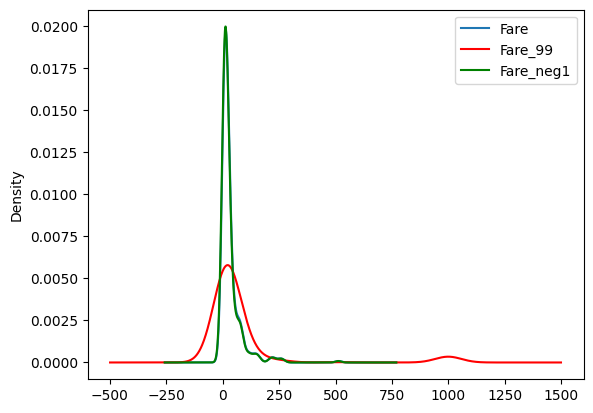

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original var. dist.
X_train['Fare'].plot(kind='kde', ax=ax)
# median imputation dist.
X_train['Fare_99'].plot(kind='kde', ax=ax, color='red')
# mean imputation dist.
X_train['Fare_neg1'].plot(kind='kde', ax=ax, color='green')

# Legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

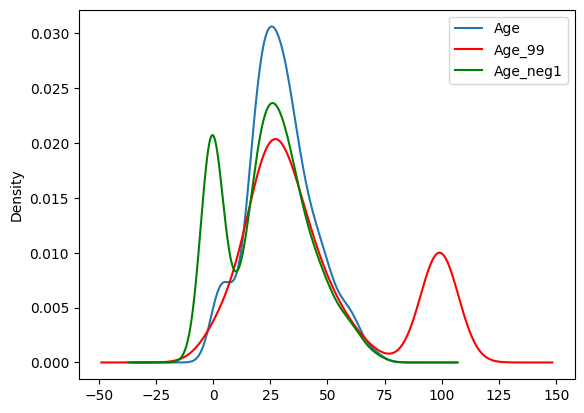

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original var. dist.
X_train['Age'].plot(kind='kde', ax=ax)
# median imputation dist.
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')
# mean imputation dist.
X_train['Age_neg1'].plot(kind='kde', ax=ax, color='green')

# Legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [19]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_neg1,Fare_99,Fare_neg1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_neg1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_99,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_neg1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [20]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_neg1,Fare_99,Fare_neg1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_neg1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_99,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_neg1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


<Axes: >

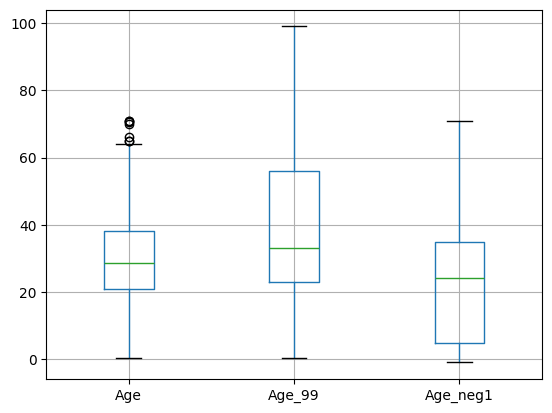

In [22]:
X_train[['Age', 'Age_99', 'Age_neg1']].boxplot()

<Axes: >

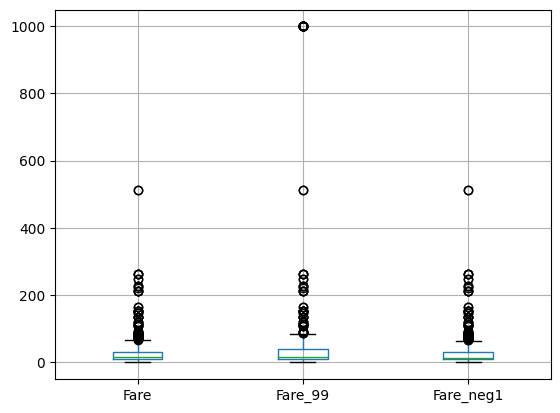

In [23]:
X_train[['Fare', 'Fare_99', 'Fare_neg1']].boxplot()


## USING SKLEARN

In [32]:
X_train, X_test, y_train, y_test = tts(X,y, random_state=2, test_size=0.2)

In [33]:
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)

In [34]:
trf = ColumnTransformer([
    ('imp1_Age', imputer1, ['Age']),
    ('imp2_Fare', imputer2, ['Fare']),
    # ('imp2_Age', imputer2, ['Age']),
    # ('imp1_Fare', imputer1, ['Fare'])
],remainder='passthrough')

In [35]:
trf.fit(X_train)


,transformers,"[('imp1_Age', ...), ('imp2_Fare', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,99


In [36]:
trf.named_transformers_['imp1_Age'].statistics_


array([99.])

In [37]:
trf.named_transformers_['imp2_Fare'].statistics_


array([999.])

In [38]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)